### Build K-nearest Neightbors from scratch using Numpy

There are 3 species which are: `Iris Setosa`, `Iris Virginica`, `Iris Veriscolr`, we have 50 Samples for each specy, overall we have  150 samples for all species.

### 1. Import libraries

In [167]:
import numpy as np
from numpy import ndarray
from typing import Literal
from typing import Callable # to define function type 
from collections import Counter 
import pandas as pd 
import seaborn as sns
import matplotlib as plt

### 2. Loading the data

In [168]:
from sklearn.datasets import load_iris

df = pd.read_csv('Iris.csv')

In [169]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


let's encode our target variable first

In [170]:
encoder = lambda x: {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}.get(x, None)


df['Species'] = df['Species'].apply(encoder)

let's seqerate the data into `X` feature vector and `y` target variable

In [171]:
X = df.drop('Species', axis=1)
y = df['Species']

In [172]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [173]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Species
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


### 3. Exploratory Data Anaylsis (EDA)

before we start our EDA we need to split our data into `training data` and `testing data` because in real world not have chance to do EDA on your test it before test  your model on it.

before we split our data we need to drop Id column because does not provide useful information for our model

In [174]:
X = X.drop('Id', axis=1)

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
print(f"training data size: {X_train.shape[0]}")
print(f"testing data size: {X_test.shape[0]}")

training data size: 120
testing data size: 30


let's see if our data is balance or not

#### 3.1 Visualize the data

let's plot our data using scatter plot

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

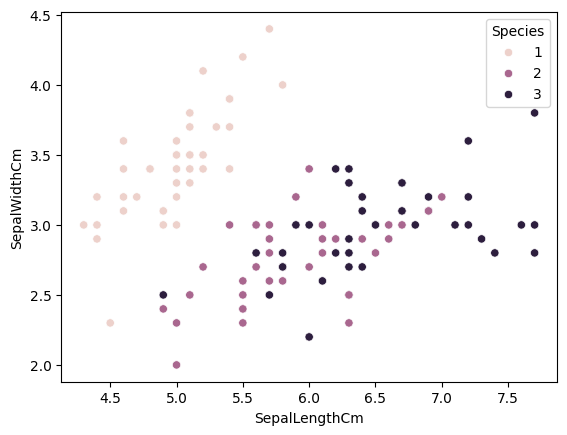

In [177]:
sns.scatterplot(data=X_train, x='SepalLengthCm', y='SepalWidthCm', hue=y_train)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

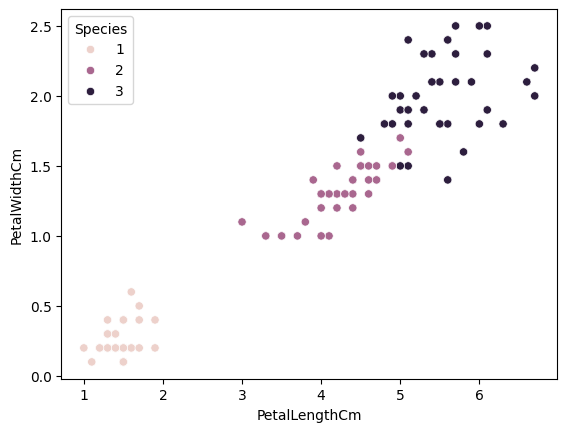

In [178]:
sns.scatterplot(data=X_train, x='PetalLengthCm', y='PetalWidthCm', hue=y_train)

### 4. Data Cleaning

since there no missing values in our data there no need to handle missing values

In [179]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


### 5. Build the model 
let's now build `kNN` model from scratch

In [180]:
class KNN:
    '''
     distance_metric variable can take three integer values :
     distance_metric = 1 : Euclidean Distance 
     distance_metric = 2 : Manhattan Distance 
     distance_metric = 3 : Cosine distance 
    '''
    
    def __init__(self, n_neighbors: int = 1, distance_metric: Literal[1, 2, 3]=1) -> None:
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None
        self.distance_metric = distance_metric
        


    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X = X
        self.y = y
  
        if not isinstance(self.X, np.ndarray):
            self.X = np.array(self.X)

        if not isinstance(self.y, np.ndarray):
            self.y = np.array(self.y)


    def predict(self, X: ndarray) -> ndarray:
        '''
        loop over every simple and predict it's label
        '''

        predict = []

        
        for x in X:
            predict.append(self.predict_x(x))

        return  np.array(predict)

    def predict_x(self, xi):
        '''
        predict simple label by calculating the distance between the current simple
        from all simples and select the closet k neighbor
        '''
        
        dist = []
        if self.distance_metric == 1:
            for yi in self.X:
                dist.append(self.euclidean_dis(xi, yi))  
        elif self.distance_metric == 2:
            for yi in self.X:
                dist.append(self.manhattan_dis(xi, yi)) 
        elif self.distance_metric == 3:
            for yi in self.X:
                dist.append(self.cos_distance(xi, yi)) 
        
        dist = np.array(dist) 

                
        dis = np.array(dist)
        
        # sort neighbors  
        neighbor_indexs = np.argsort(dist)

        # select K-neareast neighbors
        nearest_neighbors_indexs = neighbor_indexs[:self.n_neighbors]

        
        
        neighbors_labels = []
        
        for i in nearest_neighbors_indexs:
            neighbors_labels.append(self.y[i])

    
        return self.most_frequent_neigbor(neighbors_labels)

    def euclidean_dis(self, x: ndarray, y: ndarray) -> float:
        return np.sqrt(np.sum(x - y) * np.sum(x - y))
        
    def manhattan_dis(self, x: ndarray, y: ndarray) -> float:
        return np.absolute(np.sum(x - y))

    def cos_distance(self, x: ndarray, y: ndarray) -> float: 
        numerator = np.dot(x, y)
        norm_x = np.linalg.norm(x)
        norm_y = np.linalg.norm(y)
        denominator = norm_x * norm_y
        
        return 1 - numerator / denominator

    def most_frequent_neigbor(self, neigbors):
        '''
        count the frequence of each element and return
        the most common neigbor
        '''
        occur_counter = Counter(neigbors)
        return  occur_counter.most_common()[0][0] 


    def accuracy_score(self, x_feature: ndarray, y_target:ndarray) -> None:

        
        if not isinstance(x_feature, np.ndarray):
            x_feature = np.array(x_feature)

        if not isinstance(y_target, np.ndarray):
            y_target = np.array(y_target)
        
        y_pred = self.predict(x_feature)
        print(f"Accuracy: {np.mean(y_pred == y_target)}")

        if self.distance_metric == 1:
            print("distance metric: Euclidean Distance")
        elif self.distance_metric == 2:
            print("distance metric: Manhattan Distance")
        elif self.distance_metric == 3:
            print("distance metric: Cosine distance")


### 6. Train the model

In [181]:
model1 = KNN(n_neighbors=3, distance_metric=1)
model2 = KNN(n_neighbors=3, distance_metric=2)
model3 = KNN(n_neighbors=3, distance_metric=3)

### 7. Evaluating the KNN

In [182]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

In [183]:
model1.accuracy_score(X_test, y_test)
model2.accuracy_score(X_test, y_test)
model3.accuracy_score(X_test, y_test)

Accuracy: 0.9
distance metric: Euclidean Distance
Accuracy: 0.9
distance metric: Manhattan Distance
Accuracy: 0.9666666666666667
distance metric: Cosine distance
